In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('data.ods', sheet_name=None)

In [3]:
th_r = data['th(r)']

r_inv_sq = 1 / th_r[r'$R = R_{\text{вн}} + R_L$, Ом']**2
th_inv_sq = 1 / th_r[r'$\theta = \ln \frac{U_k}{U_{k+1}}$']**2

In [4]:
def plt_singleton(title, xlabel, ylabel):
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.minorticks_on()
  plt.grid(linestyle='-', which='major')
  plt.grid(linestyle='--', which='minor')
  plt.legend()


In [5]:
FIGSIZE=(10,5)

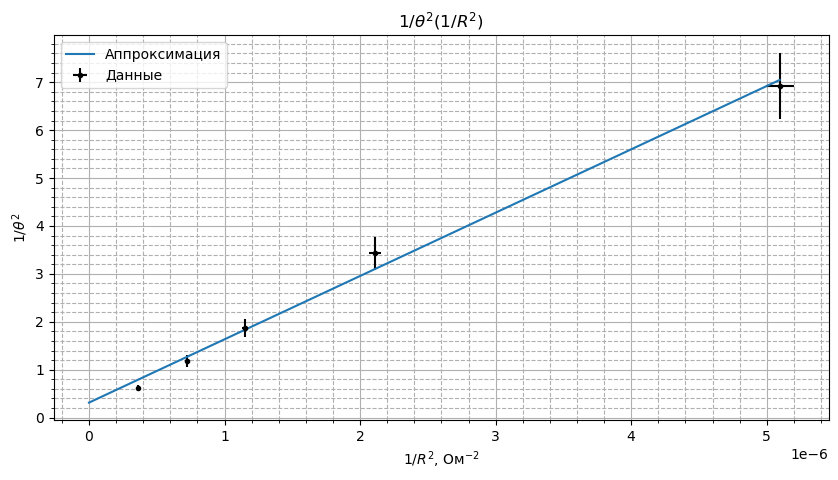

In [6]:
plt.figure(figsize=FIGSIZE)

xerr = r_inv_sq * 0.02
yerr = th_inv_sq * 0.10

plt.errorbar(r_inv_sq, th_inv_sq, xerr=xerr, yerr=yerr, fmt='k.', label='Данные')

x = np.linspace(0, max(r_inv_sq), 1000)
[a, b] = np.polyfit(r_inv_sq, th_inv_sq, deg=1)
plt.plot(x, a * x + b, label='Аппроксимация')

plt_singleton(title=r'$1/\theta^2(1/R^2)$', xlabel=r'$1/R^2$, Ом$^{-2}$', ylabel=r'$1/\theta^2$')
plt.savefig('images/th(r).pdf')

In [7]:
from scipy.optimize import curve_fit

In [8]:
def fit(f, x, y):
  """Аргументы:
      f - функция, которую мы хотим оптимизировать.
      params - начальное состояние параметров, можно просто передать нули,
          главное чтоб их было нужное количество
      x, y - точки, под которые подгоняем функцию
  """
  if len(x) != len(y):
    raise "Иксов должно быть столько же, сколько и игреков"

  return curve_fit(f, x, y)

In [9]:
def lorenz_func(x, a, b, c, d):
  return a / np.sqrt(b + (c * x - d / x)**2)

In [10]:
def fchh(x, a, s, r):
  return np.atan(a * (x - s)) / np.pi + r

/usr/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


[ 1.85868025  3.48262909 15.45460341 15.5825416 ]


/usr/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


[0.97228651 0.93100223 2.09980112 2.33631857]


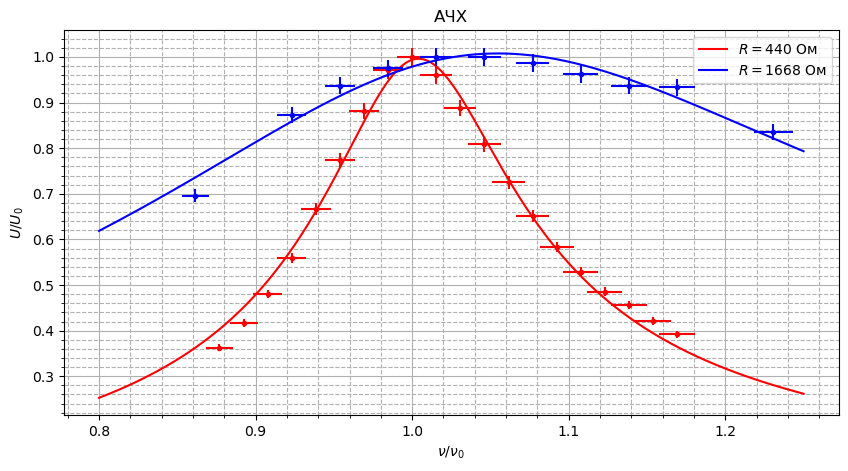

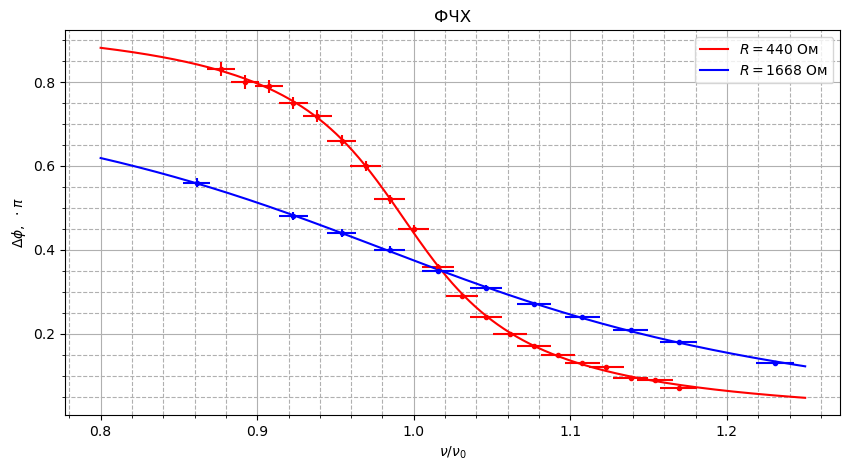

In [11]:
i = 0

colors = ['red', 'blue']
labels = [r'$R = 440$ Ом', r'$R = 1668$ Ом']

x = np.linspace(0.8, 1.25, 1000)

for acch in [data['ACCH'], data['ACCH2']]:
  # АЧХ
  ach = plt.figure(figsize=FIGSIZE, num=0)

  rel_fr = acch[r'$\nu$, Гц'] / 6500
  rel_u = acch[r'$U$, В']
  rel_u /= max(rel_u)

  plt.errorbar(rel_fr, rel_u, xerr=0.01*rel_fr, yerr=0.02*rel_u, fmt=f'{colors[i][0]}.')
  par, _ = fit(f=lorenz_func, x=rel_fr, y=rel_u)
  print(par)
  plt.plot(x, lorenz_func(x, *par), color=colors[i], label=labels[i])

  plt_singleton(title='АЧХ', xlabel=r'$\nu/\nu_0$', ylabel=r'$U/U_0$')
  plt.savefig('images/ACCH.pdf')

  # ФЧХ
  fch = plt.figure(figsize=FIGSIZE, num=1)

  phi = acch[r'$\Delta \phi$, $\cdot \pi$']
  plt.errorbar(rel_fr, phi, xerr=rel_fr*0.01, yerr=phi*0.02, fmt=f'{colors[i][0]}.')
  par, _ = fit(f=fchh, x=rel_fr, y=phi)
  plt.plot(x, fchh(x, *par), color=colors[i], label=labels[i])

  plt_singleton(title='ФЧХ', xlabel=r'$\nu/\nu_0$', ylabel=r'$\Delta \phi,\ \cdot\pi$')
  plt.savefig('images/FCHH.pdf')

  i += 1
